# Imports

In [1]:
import torch
import torch.optim as optim
import numpy as np
import node_models
import loader
import training
import metrics
import autotune
import config

# GPU

In [2]:
device = torch.device("cuda")

# Data Loading

In [3]:
cifar_data_path = './cifar-10-batches-py'

In [4]:
cifar_data = loader.CIFAR(cifar_data_path, 5)
cifar_splits = cifar_data.splits

In [5]:
print("CIFAR STATS")
print("Number of splits:", len(cifar_splits))
print("Number of segments per split (train, val, test):", len(cifar_splits[0]))
print("Info per segment (data, labels):", len(cifar_splits[0][0]))
print("Size of segement (num examples):", len(cifar_splits[0][0][0]))

CIFAR STATS
Number of splits: 5
Number of segments per split (train, val, test): 3
Info per segment (data, labels): 2
Size of segement (num examples): 40000


# Model & Optimizer

In [6]:
model = node_models.NeuralODE
optimizer = optim.Adam

# Training and Evaluation

## CIFAR

### NODE

In [7]:
model_params = config.baseline_config_cifar_node['model']
lr, epochs, batch, workers = config.baseline_config_cifar_node['train']

In [8]:
node_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [9]:
node_cifar_trainer.train(model_params, lr, epochs, batch, workers, verbose=False)

[Fold 1] Epoch:1 Training Acc:0.228275
[Fold 1] Epoch:1 Validation Acc:0.2822
[Fold 1] Epoch:2 Training Acc:0.333225
[Fold 1] Epoch:2 Validation Acc:0.344
[Fold 1] Epoch:3 Training Acc:0.38575
[Fold 1] Epoch:3 Validation Acc:0.3816
[Fold 1] Epoch:4 Training Acc:0.418275
[Fold 1] Epoch:4 Validation Acc:0.4044
[Fold 1] Epoch:5 Training Acc:0.437125
[Fold 1] Epoch:5 Validation Acc:0.4126
[Fold 1] Epoch:6 Training Acc:0.447575
[Fold 1] Epoch:6 Validation Acc:0.4178
[Fold 1] Epoch:7 Training Acc:0.464275
[Fold 1] Epoch:7 Validation Acc:0.4404
[Fold 1] Epoch:8 Training Acc:0.477775
[Fold 1] Epoch:8 Validation Acc:0.4378
[Fold 1] Epoch:9 Training Acc:0.487675
[Fold 1] Epoch:9 Validation Acc:0.4478
[Fold 1] Epoch:10 Training Acc:0.49645
[Fold 1] Epoch:10 Validation Acc:0.452
[Fold 1] Epoch:11 Training Acc:0.505675
[Fold 1] Epoch:11 Validation Acc:0.4618
[Fold 1] Epoch:12 Training Acc:0.5161
[Fold 1] Epoch:12 Validation Acc:0.461
[Fold 1] Epoch:13 Training Acc:0.5201
[Fold 1] Epoch:13 Validatio

[Fold 3] Epoch:5 Validation Acc:0.4072
[Fold 3] Epoch:6 Training Acc:0.42985
[Fold 3] Epoch:6 Validation Acc:0.4078
[Fold 3] Epoch:7 Training Acc:0.4466
[Fold 3] Epoch:7 Validation Acc:0.4316
[Fold 3] Epoch:8 Training Acc:0.458675
[Fold 3] Epoch:8 Validation Acc:0.4404
[Fold 3] Epoch:9 Training Acc:0.46925
[Fold 3] Epoch:9 Validation Acc:0.449
[Fold 3] Epoch:10 Training Acc:0.48205
[Fold 3] Epoch:10 Validation Acc:0.448
[Fold 3] Epoch:11 Training Acc:0.492025
[Fold 3] Epoch:11 Validation Acc:0.4572
[Fold 3] Epoch:12 Training Acc:0.501475
[Fold 3] Epoch:12 Validation Acc:0.4622
[Fold 3] Epoch:13 Training Acc:0.5113
[Fold 3] Epoch:13 Validation Acc:0.473
[Fold 3] Epoch:14 Training Acc:0.52155
[Fold 3] Epoch:14 Validation Acc:0.479
[Fold 3] Epoch:15 Training Acc:0.52395
[Fold 3] Epoch:15 Validation Acc:0.4804
[Fold 3] Epoch:16 Training Acc:0.534975
[Fold 3] Epoch:16 Validation Acc:0.4892
[Fold 3] Epoch:17 Training Acc:0.54575
[Fold 3] Epoch:17 Validation Acc:0.4946
[Fold 3] Epoch:18 Train

[Fold 5] Epoch:10 Training Acc:0.49
[Fold 5] Epoch:10 Validation Acc:0.4708
[Fold 5] Epoch:11 Training Acc:0.50595
[Fold 5] Epoch:11 Validation Acc:0.4698
[Fold 5] Epoch:12 Training Acc:0.5163
[Fold 5] Epoch:12 Validation Acc:0.4758
[Fold 5] Epoch:13 Training Acc:0.527275
[Fold 5] Epoch:13 Validation Acc:0.4786
[Fold 5] Epoch:14 Training Acc:0.535325
[Fold 5] Epoch:14 Validation Acc:0.5006
[Fold 5] Epoch:15 Training Acc:0.54715
[Fold 5] Epoch:15 Validation Acc:0.4976
[Fold 5] Epoch:16 Training Acc:0.553875
[Fold 5] Epoch:16 Validation Acc:0.51
[Fold 5] Epoch:17 Training Acc:0.563725
[Fold 5] Epoch:17 Validation Acc:0.5006
[Fold 5] Epoch:18 Training Acc:0.5701
[Fold 5] Epoch:18 Validation Acc:0.5134
[Fold 5] Epoch:19 Training Acc:0.579425
[Fold 5] Epoch:19 Validation Acc:0.4982
[Fold 5] Epoch:20 Training Acc:0.5871
[Fold 5] Epoch:20 Validation Acc:0.5162
[Fold 5] Epoch:21 Training Acc:0.5982
[Fold 5] Epoch:21 Validation Acc:0.5232
[Fold 5] Epoch:22 Training Acc:0.609225
[Fold 5] Epoch:2

In [10]:
node_cifar_trainer.test(model_params, batch, workers)

[Fold: 1] Testing Acc: 0.5146
[Fold: 2] Testing Acc: 0.5132
[Fold: 3] Testing Acc: 0.5264
[Fold: 4] Testing Acc: 0.521
[Fold: 5] Testing Acc: 0.5108


### ANODE

In [11]:
model_params = config.baseline_config_cifar_anode['model']
lr, epochs, batch, workers = config.baseline_config_cifar_anode['train']

In [12]:
anode_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [13]:
anode_cifar_trainer.train(model_params, lr, epochs, batch, workers, verbose=False)

[Fold 1] Epoch:1 Training Acc:0.2409
[Fold 1] Epoch:1 Validation Acc:0.2822
[Fold 1] Epoch:2 Training Acc:0.319325
[Fold 1] Epoch:2 Validation Acc:0.3372
[Fold 1] Epoch:3 Training Acc:0.386
[Fold 1] Epoch:3 Validation Acc:0.3532
[Fold 1] Epoch:4 Training Acc:0.439625
[Fold 1] Epoch:4 Validation Acc:0.4026
[Fold 1] Epoch:5 Training Acc:0.4904
[Fold 1] Epoch:5 Validation Acc:0.4596
[Fold 1] Epoch:6 Training Acc:0.53035
[Fold 1] Epoch:6 Validation Acc:0.4858
[Fold 1] Epoch:7 Training Acc:0.57295
[Fold 1] Epoch:7 Validation Acc:0.4936
[Fold 1] Epoch:8 Training Acc:0.612825
[Fold 1] Epoch:8 Validation Acc:0.4826
[Fold 1] Epoch:9 Training Acc:0.646125
[Fold 1] Epoch:9 Validation Acc:0.5252
[Fold 1] Epoch:10 Training Acc:0.673275
[Fold 1] Epoch:10 Validation Acc:0.5434
[Fold 1] Epoch:11 Training Acc:0.6938
[Fold 1] Epoch:11 Validation Acc:0.5194
[Fold 1] Epoch:12 Training Acc:0.714175
[Fold 1] Epoch:12 Validation Acc:0.5516
[Fold 1] Epoch:13 Training Acc:0.735975
[Fold 1] Epoch:13 Validation 

[Fold 3] Epoch:5 Validation Acc:0.3812
[Fold 3] Epoch:6 Training Acc:0.449225
[Fold 3] Epoch:6 Validation Acc:0.4082
[Fold 3] Epoch:7 Training Acc:0.461425
[Fold 3] Epoch:7 Validation Acc:0.4048
[Fold 3] Epoch:8 Training Acc:0.49205
[Fold 3] Epoch:8 Validation Acc:0.433
[Fold 3] Epoch:9 Training Acc:0.506075
[Fold 3] Epoch:9 Validation Acc:0.4232
[Fold 3] Epoch:10 Training Acc:0.5355
[Fold 3] Epoch:10 Validation Acc:0.4612
[Fold 3] Epoch:11 Training Acc:0.568525
[Fold 3] Epoch:11 Validation Acc:0.468
[Fold 3] Epoch:12 Training Acc:0.6038
[Fold 3] Epoch:12 Validation Acc:0.492
[Fold 3] Epoch:13 Training Acc:0.626425
[Fold 3] Epoch:13 Validation Acc:0.4996
[Fold 3] Epoch:14 Training Acc:0.647175
[Fold 3] Epoch:14 Validation Acc:0.4986
[Fold 3] Epoch:15 Training Acc:0.666375
[Fold 3] Epoch:15 Validation Acc:0.5154
[Fold 3] Epoch:16 Training Acc:0.685975
[Fold 3] Epoch:16 Validation Acc:0.5204
[Fold 3] Epoch:17 Training Acc:0.714775
[Fold 3] Epoch:17 Validation Acc:0.517
[Fold 3] Epoch:18 

[Fold 5] Epoch:10 Training Acc:0.549425
[Fold 5] Epoch:10 Validation Acc:0.4726
[Fold 5] Epoch:11 Training Acc:0.585225
[Fold 5] Epoch:11 Validation Acc:0.487
[Fold 5] Epoch:12 Training Acc:0.602025
[Fold 5] Epoch:12 Validation Acc:0.4998
[Fold 5] Epoch:13 Training Acc:0.632125
[Fold 5] Epoch:13 Validation Acc:0.4984
[Fold 5] Epoch:14 Training Acc:0.659625
[Fold 5] Epoch:14 Validation Acc:0.505
[Fold 5] Epoch:15 Training Acc:0.677025
[Fold 5] Epoch:15 Validation Acc:0.5164
[Fold 5] Epoch:16 Training Acc:0.706025
[Fold 5] Epoch:16 Validation Acc:0.5212
[Fold 5] Epoch:17 Training Acc:0.717575
[Fold 5] Epoch:17 Validation Acc:0.5208
[Fold 5] Epoch:18 Training Acc:0.738525
[Fold 5] Epoch:18 Validation Acc:0.5368
[Fold 5] Epoch:19 Training Acc:0.747225
[Fold 5] Epoch:19 Validation Acc:0.5278
[Fold 5] Epoch:20 Training Acc:0.76695
[Fold 5] Epoch:20 Validation Acc:0.537
[Fold 5] Epoch:21 Training Acc:0.785375
[Fold 5] Epoch:21 Validation Acc:0.5362
[Fold 5] Epoch:22 Training Acc:0.799575
[Fol

In [14]:
anode_cifar_trainer.test(model_params, batch, workers)

[Fold: 1] Testing Acc: 0.5358
[Fold: 2] Testing Acc: 0.535
[Fold: 3] Testing Acc: 0.5066
[Fold: 4] Testing Acc: 0.53
[Fold: 5] Testing Acc: 0.5136


# Plots

In [15]:
node_cifar_trainer.val_metrics['legend'] = 'NODE'
anode_cifar_trainer.val_metrics['legend'] = 'ANODE'
out_metrics = [node_cifar_trainer.val_metrics, anode_cifar_trainer.val_metrics]

In [16]:
plt = metrics.Plotter(out_metrics)

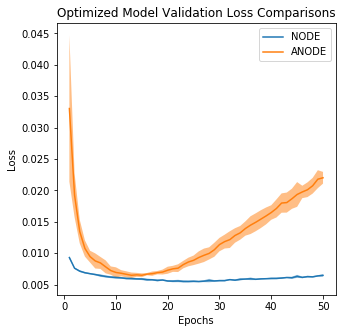

In [17]:
plt.plotLoss("Optimized Model Validation Loss Comparisons")

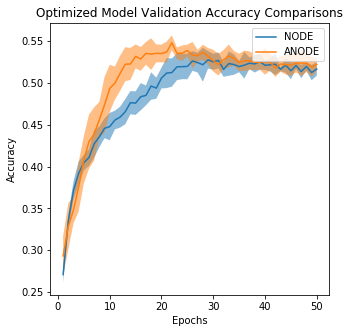

In [18]:
plt.plotAccuracy("Optimized Model Validation Accuracy Comparisons")

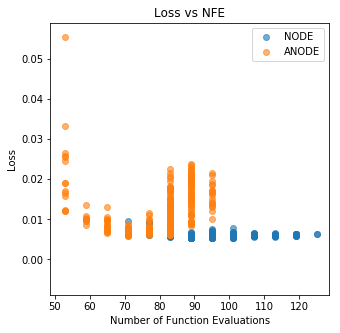

In [19]:
plt.plotNFE("Loss vs NFE", style='loss')

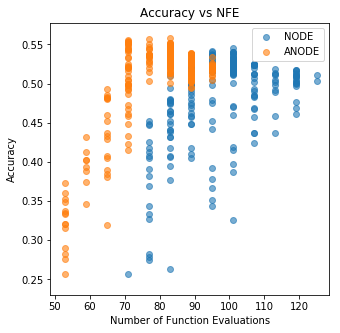

In [20]:
plt.plotNFE("Accuracy vs NFE", style='accuracy')